# LSVM Linear Support Vector Classifier

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

# Con matplotlib no se podran visualizar los datos correctamente con mas de 3 variables. 
#Algoritmo supervisado

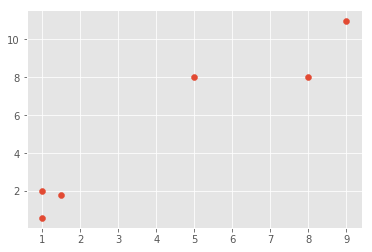

In [22]:
X = [1, 5, 1.5, 8, 1, 9]
Y = [2, 8, 1.8, 8, 0.6, 11]

plt.scatter(X,Y)
plt.show()

In [30]:
data = np.array(list(zip(X,Y)))
data  

array([[ 1. ,  2. ],
       [ 5. ,  8. ],
       [ 1.5,  1.8],
       [ 8. ,  8. ],
       [ 1. ,  0.6],
       [ 9. , 11. ]])

In [31]:
target = [0, 1, 0, 1, 0, 1]

In [43]:
#Linear es que buscamos una recta(un hiperplano de dimension 2)
#C = 1.0 forma de evaluar como de mal queremos que clasidique. (parametro a modificar)
classifier = svm.SVC(kernel="linear", C=1.0) 
classifier.fit(data, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [46]:
p = np.array([0.57, 0.67]).reshape(1,2)
classifier.predict(p)
#Caeria en la zona de abajo.

array([0])

In [47]:
p = np.array([10.32, 12.67]).reshape(1,2)
classifier.predict(p)
#Caeria en la zona de arriba.

array([1])

# Representacion grafica.

In [48]:
w = classifier.coef_[0]
w

array([0.1380943 , 0.24462418])

In [49]:
a = -w[0]/w[1]
b = -classifier.intercept_[0]/w[1]

In [51]:
# Ecuacion del hiperplano = a*x + b
xx = np.linspace(0,10)
yy = a * xx + b

[]

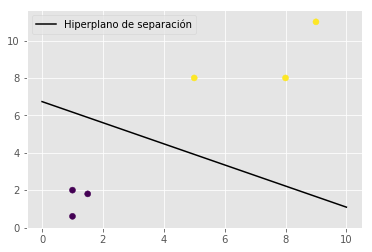

In [54]:
plt.plot(xx,yy, 'k-', label = "Hiperplano de separación")
plt.scatter(X,Y, c=target)
plt.legend()
plt.plot()

# SUPPORT VECTOR MACHINES

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns; sns.set()
from sklearn.datasets.samples_generator import make_blobs

In [60]:
X, Y = make_blobs(n_samples = 50, centers=2, random_state=0, cluster_std=0.6)

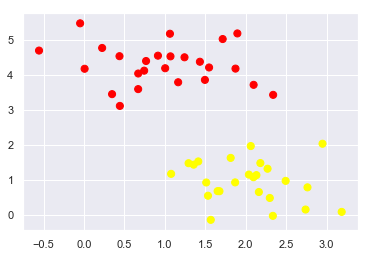

In [62]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

## Maximización del margen

(-1, 3.5)

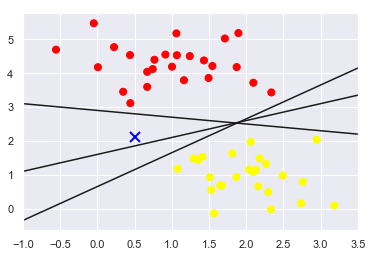

In [68]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap = "autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a,b in [(1,0.65),(0.5, 1.6),(-0.2, 2.9)]:
    yy = a*xx+b
    plt.plot(xx, yy, "-k")
    
plt.xlim(-1,3.5)

(-1, 3.5)

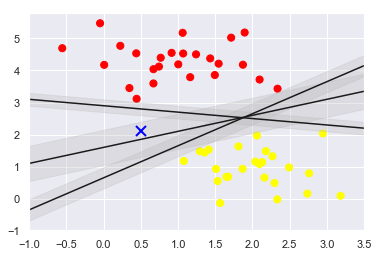

In [70]:
xx = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap = "autumn")
plt.plot([0.5], [2.1], "x", color="blue", markeredgewidth=2, markersize=10)

for a,b,d in [(1,0.65, 0.33),(0.5, 1.6, 0.55),(-0.2, 2.9, 0.2)]:
    yy = a*xx+b
    plt.plot(xx, yy, "-k")
    plt.fill_between(xx, yy-d, yy+d, edgecolor='none', color="#BBBBBB", alpha= 0.3)
                                                        #Gris Clarito    #degradado 0.3
    
plt.xlim(-1,3.5)

## Creacion del modelo SVM

In [95]:
from sklearn.svm import SVC

In [99]:
model = SVC(kernel = "linear", C= 1E10)
model.fit(X,Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
def plt_svc(model, ax=None, plot_support= True):
    """Plot de la funcion de decision para una clasificacion en 2D con SVC"""
    if ax is None:
        ax= plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrilla de puntos para evaluar el modelo.
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1],30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T #Tupla
    P = model.decision_function(xy).reshape(X.shape)
    
    ##Representamos las fronteras y los márgenes
    ax.contour(X, Y, P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
    
    """
    if plot_support:
      ax.scatter(model.support_vertors_[:,0],
                 model.support_vectors_[:,1],
                s=300, linewidth=1, facecolors = "black")
    """    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

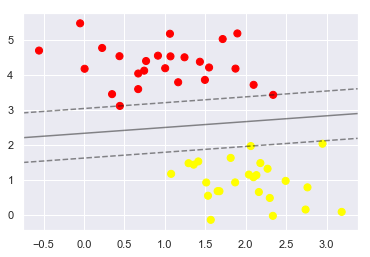

In [113]:
plt.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap = "autumn")
plt_svc(model, plot_support=True)

In [124]:
def plot_svm(N=10, ax=None):
    X,Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel = "linear", C= 1E10)
    model.fit(X,Y)
    
    ax=ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

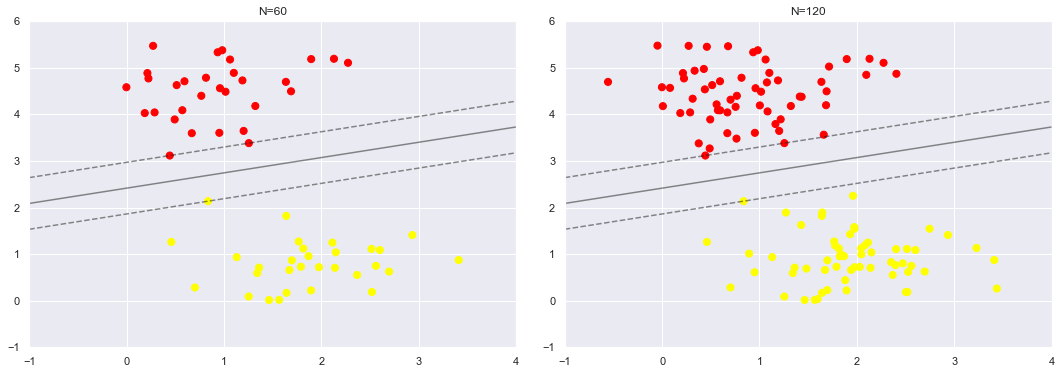

In [125]:
fig, ax= plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left= 0.0625, right=0.95, wspace=0.1)
for ax_i,N in zip(ax,[60,120]):
    plot_svm(N, ax_i)
    ax_i.set_title("N={0}".format(N))

In [130]:
from ipywidgets import interact, fixed

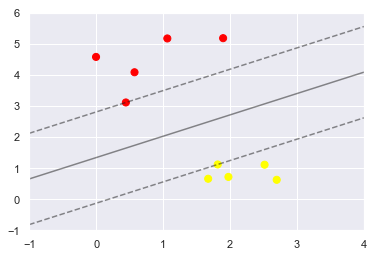

<function __main__.plot_svm>

In [136]:
interact(plot_svm, N=[10,200, 300], ax = fixed(None))